# 인공 신경망

## 패션 MNIST

In [22]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# load_data() 함수는 친절하게 훈련데이토와 테스트 데이터를 나누어 반환 
#


In [23]:
print(train_input.shape, train_target.shape)
# 훈련용 테스트셋 60000개 이미지 가로 * 세로 28

(60000, 28, 28) (60000,)


In [24]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


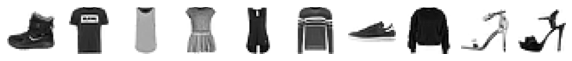

In [25]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [26]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [27]:
import numpy as np

print(np.unique(train_target, return_counts=True))
# 타깃값의 속성값은 0-9까지 이뤄짐 레이블 9개 
# 각 레이블마다 6000개읭 샘플이 있음 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

데이터 크기가 60,000개나 되니까 전체 데이터 한꺼번에 훈련 시키는 것보다 샘플을 하나씩 꺼내서 모델 훈련하는 것이 효율적 

SGDClassifier 클래스에 로지스틱 손실함수 제공 -> 확률적 경사 하강법
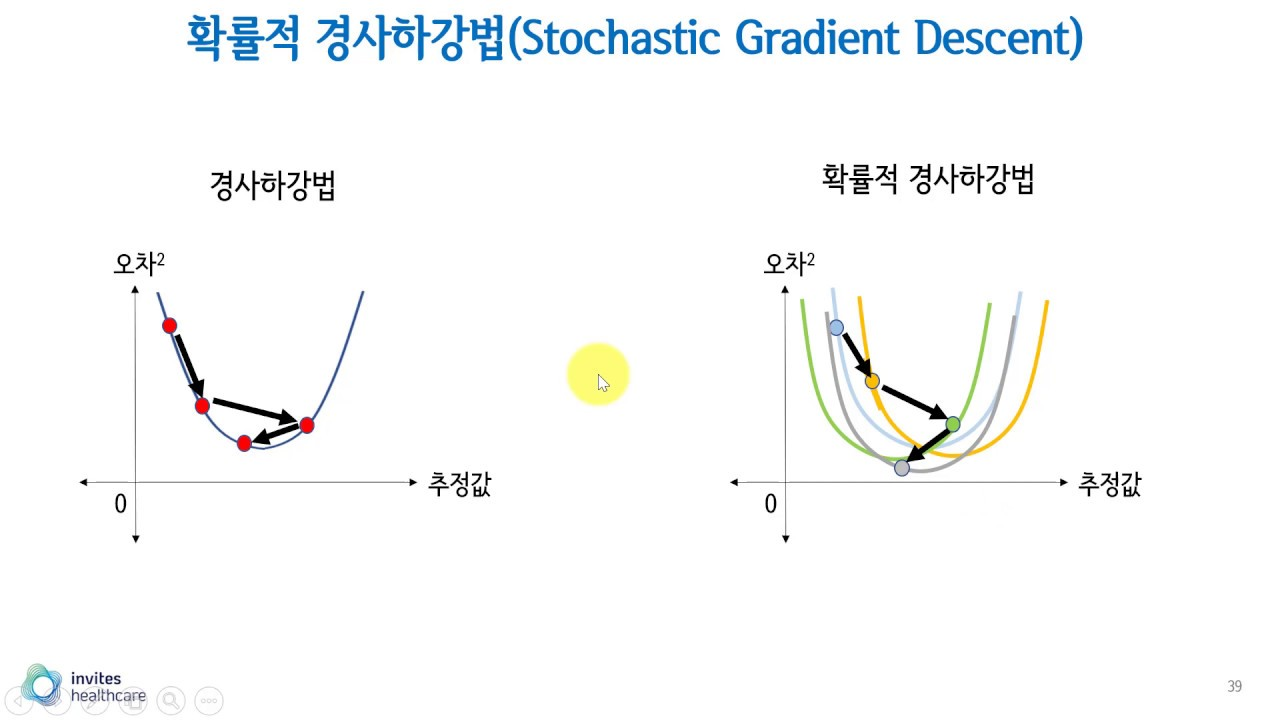

SGDClassifier 사용하면 표준화된 전처리 데이터를 사용해야함
- 기울기니까 막 특성들의 단위가 같아야 차이가 크게 안 난다 
- MINST 경우 각 픽셀 0-255사이 정수값 
- 이미지의 겨우 보통 255로 나누면 0 - 1 사이 값으로 정규화됨 -> 표준화는 아니지만 양숫값으로 이루어진 이미지 처리시 많이사용 **값/255**



In [28]:
# 픽셀값으 255로 나눠서 0-1 사이값으로 표준화?
train_scaled = train_input / 255.0

#SDGClassifier는 2차원 입력 못 다루니까 각 샘플을 1차원 배열로 ㄹ만들어야하 
train_scaled = train_scaled.reshape(-1, 28*28)

In [29]:
print(train_scaled.shape)

(60000, 784)


In [30]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


## 인공신경망

### 텐서플로와 케라스

In [31]:
import tensorflow as tf

In [32]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

In [33]:
from sklearn.model_selection import train_test_split
# 로지스틱 회귀에서만든 훈련데이터 train_scaled와 train_target 사용 
# 딥러닝에서는 데이터셋이 충분히 크니까 교차검증을 굳이 하지 않음 시간 많이 걸림 

#train_test_split으로 훈련세트와 검증세트 나눔 
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [34]:
print(train_scaled.shape, train_target.shape)
#훈련세트 480000

(48000, 784) (48000,)


In [35]:
print(val_scaled.shape, val_target.shape)
#검증세트 12000

(12000, 784) (12000,)


밀집층 
- 각 입력층과 뉴련이 한번씩 선 그어도 오지게 많은 선들이 보임 
- 뺵빽하니까 밀집층이라고 함 ! 
- 가장 기본이 되는 층 

In [36]:
# 밀집층 만들기 dense()
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
#매개변수
#1. 뉴런의 갯수 : 10개 패션 아이템 분류하기 위해서 
#2. 활성화함수 : 10개 뉴련에서 출력되는 값들을 확률로 바꾸기 위해서 softmax 함수 사용 만약 2개라면 simoid 썼겠지
#3. 입력값의 크기 : 10개 뉴런이 각각 몇 개의 입력을 받는지 튜플로 지정 // 784개의 픽셀이니까 784로 지정 

#이로써 밀집층 만들기 끝 
 

In [37]:
model = keras.Sequential(dense)
# 만들어둔 밀집층을 신경망으로 만듦 

## 인공신경망으로 패션 아이템 분류하기

In [44]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# 케라스의 경우 훈련하기 전에 model 객체의 compile()메서드를 수행해야함 
# 꼭 지정해야한느 것은 손실함수 종류 ... 또 훈련과정에서 계산하고 싶은 측정값 
# categorical_crossentropy -> 10개 클래스에 대한 확률이 다 나오면 안되니 타깃에 해당하는 확률만 남기고 나머지 에 *0함 = 원-핫 인코딩 
# sparse_categorical_crossentropy -> 원핫인코딩으로 안 바꾸고 정수로 사용한다! 

In [43]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [40]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6080 - accuracy: 0.7940
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4786 - accuracy: 0.8396
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4547 - accuracy: 0.8483
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4444 - accuracy: 0.8532
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4363 - accuracy: 0.8549


In [41]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4530 - accuracy: 0.8497


[0.453007310628891, 0.8497499823570251]